**Step 1: Importing the required libraries**

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [123]:
df=pd.read_csv('/content/drive/MyDrive/reddit comments sentiment analysis/YoutubeCommentsDataSet.csv')
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [124]:
df.shape

(18408, 2)

**Step** **2**: **Data** **Preprocessing**

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


In [126]:
df.describe()

,Comment,Sentiment
count,18364,18408
unique,17871,3
top,nice,positive
freq,10,11432


In [127]:
df.isna().sum()

,0
Comment,44
Sentiment,0


In [128]:
df.duplicated().sum()

np.int64(531)

In [129]:
df[df.duplicated()]

,Comment,Sentiment
173,from all the stuff mentioned i have the dji mi...,positive
518,happy independence day to ukraine and glory t...,negative
847,linus just turn the key lights 180 and bounce ...,positive
848,dan continues to be my new favorite he has suc...,positive
849,dan managing to set up his soldering station o...,positive
...,...,...
18145,explore our free courses with completion certi...,neutral
18283,thanks for this video very neatly calmly expla...,positive
18298,explore our free courses with completion certi...,neutral
18308,do you want to learn technology from me check ...,neutral


In [130]:
df.isna().sum()

,0
Comment,44
Sentiment,0


In [131]:
df.drop_duplicates(inplace=True)

In [132]:
df.dropna(inplace=True)

In [133]:
df['sentiment_value']=df['Sentiment'].map({'positive':1,'negative':-1,'neutral':0})

In [134]:
df

,Comment,Sentiment,sentiment_value
0,lets not forget that apple pay in 2014 require...,neutral,0
1,here in nz 50 of retailers don’t even have con...,negative,-1
2,i will forever acknowledge this channel with t...,positive,1
3,whenever i go to a place that doesn’t take app...,negative,-1
4,apple pay is so convenient secure and easy to ...,positive,1
...,...,...,...
18403,i really like the point about engineering tool...,positive,1
18404,i’ve just started exploring this field and thi...,positive,1
18405,excelente video con una pregunta filosófica pr...,neutral,0
18406,hey daniel just discovered your channel a coup...,positive,1


In [135]:
df.dtypes

,0
Comment,object
Sentiment,object
sentiment_value,int64


In [136]:
df['Comment']=df.Comment.str.lower()

In [137]:
df['Comment'].apply(lambda x:isinstance(x,str) and (x.startswith(' ') or x.endswith(' '))).sum()

np.int64(2372)

In [138]:
df.Comment=df.Comment.str.strip()

In [139]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import re

In [140]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [141]:
stopwordslist=stopwords.words('english')
stopwordslist.remove('not')
len(stopwordslist)

197

In [142]:
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [143]:
df.Comment.str.contains('\n').sum()

np.int64(0)

**Step 3: EDA**

In [144]:
# sentiment value counts
sentim_valu=df['Sentiment'].value_counts()

Text(0.5, 1.0, 'Counts of sentiment')

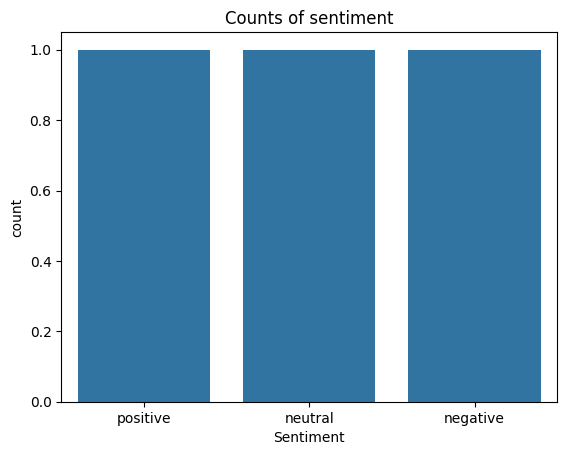

In [145]:
# plt.title('Counts of sentiment')
sns.countplot(sentim_valu)
plt.title('Counts of sentiment')

In [146]:
round(df.sentiment_value.value_counts(normalize=True)*100,2)

,proportion
sentiment_value,
1,61.84
0,25.19
-1,12.96


In [147]:
df['word_count']=df['Comment'].apply(lambda x:len(x.split()))
df['word_count']

,word_count
0,57
1,29
2,31
3,83
4,26
...,...
18403,52
18404,23
18405,40
18406,16


/tmp/ipython-input-2725435596.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['word_count'])


<Axes: xlabel='word_count', ylabel='Density'>

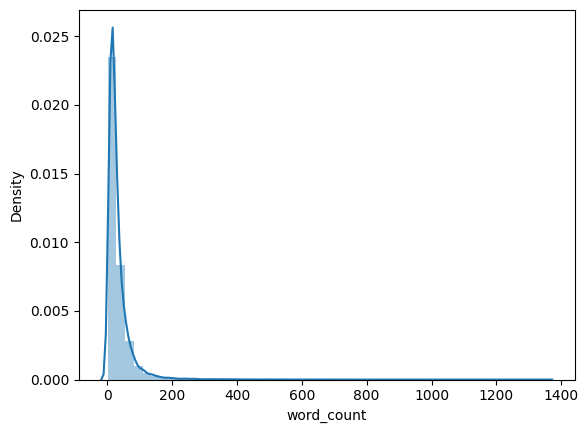

In [148]:
sns.distplot(df['word_count'])

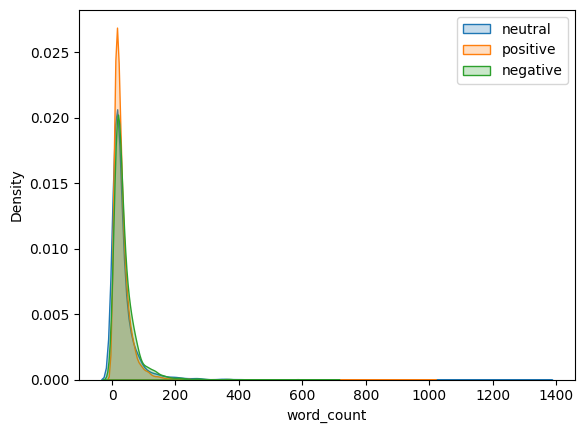

In [149]:
# neutral sentiment
sns.kdeplot(df[df['sentiment_value']==0]['word_count'],label='neutral',fill=True)

# positive sentiment
sns.kdeplot(df[df['sentiment_value']==1]['word_count'],label='positive',fill=True)

# negative sentiment
sns.kdeplot(df[df['sentiment_value']==-1]['word_count'],label='negative',fill=True)
plt.legend()

<Axes: ylabel='word_count'>

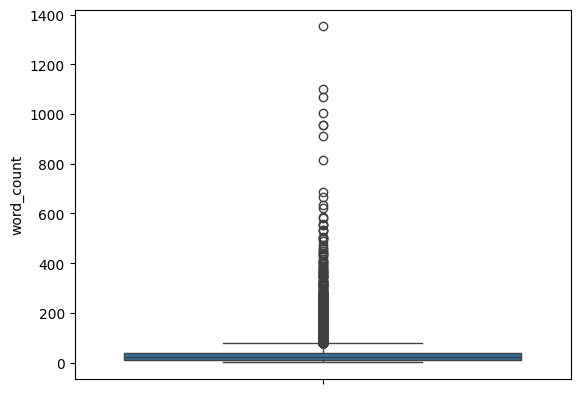

In [150]:
# check the outlier using boxplot
sns.boxplot(df['word_count'])

<Axes: xlabel='Sentiment', ylabel='word_count'>

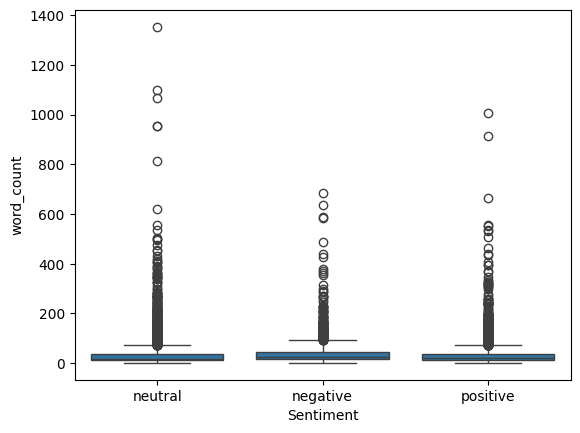

In [152]:
sns.boxplot(x='Sentiment',y='word_count',data=df)

<Axes: xlabel='sentiment_value', ylabel='word_count'>

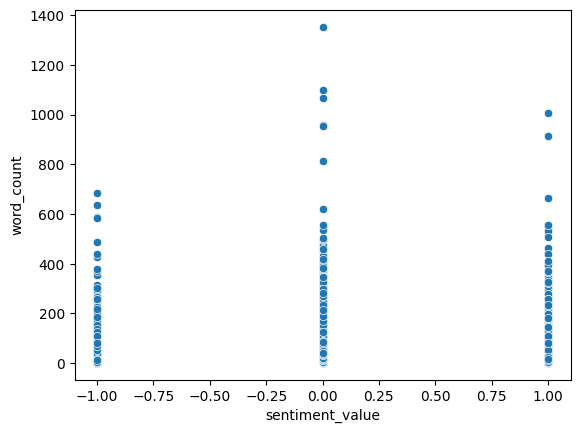

In [153]:
sns.scatterplot(x='sentiment_value',y='word_count',data=df)

<Axes: xlabel='Sentiment', ylabel='word_count'>

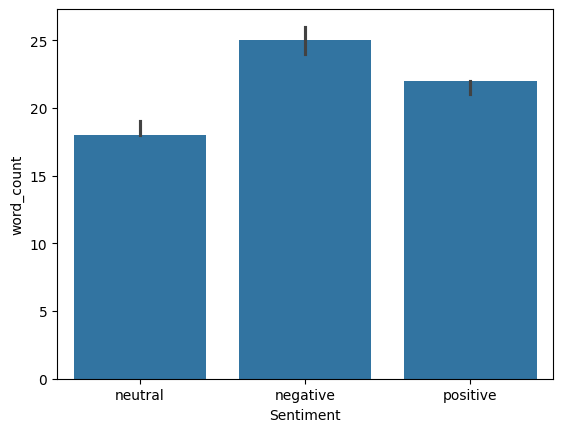

In [154]:
sns.barplot(x='Sentiment',y='word_count',data=df,estimator='median')

In [155]:

df['stopwords_count']=df['Comment'].apply(lambda x: len([word for word in word_tokenize(x) if word in stopwordslist ]))


In [156]:
df.stopwords_count.sort_values(ascending=False)

,stopwords_count
11370,511
16407,506
18362,490
5935,435
7181,372
...,...
11740,0
11739,0
33,0
32,0


<Axes: xlabel='stopwords_count', ylabel='Count'>

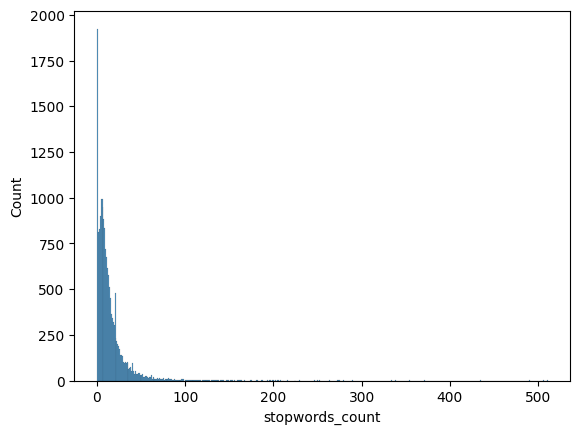

In [157]:
sns.histplot(df['stopwords_count'])

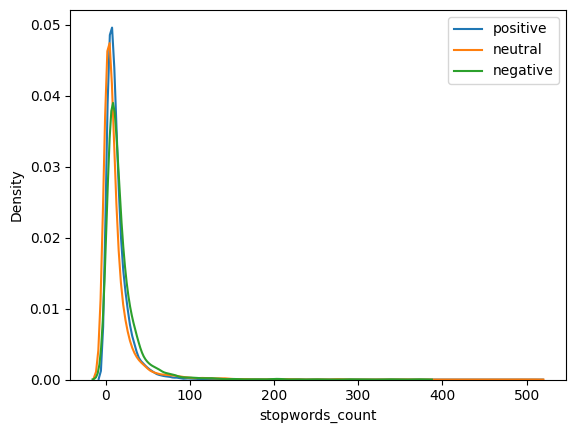

In [158]:
sns.kdeplot(df[df['sentiment_value']==1]['stopwords_count'],label='positive')
sns.kdeplot(df[df['sentiment_value']==0]['stopwords_count'],label='neutral')
sns.kdeplot(df[df['sentiment_value']==-1]['stopwords_count'],label='negative')
plt.legend()


<Axes: xlabel='Sentiment', ylabel='stopwords_count'>

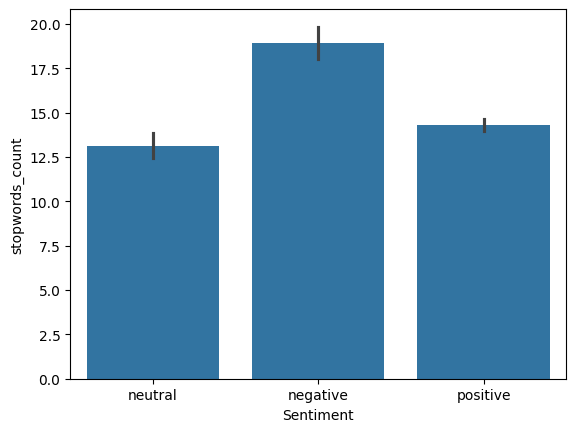

In [159]:
sns.barplot(x='Sentiment',y='stopwords_count',data=df)

In [160]:
 df[df['Comment'].str.contains('\n')]

,Comment,Sentiment,sentiment_value,word_count,stopwords_count


In [161]:
from collections import Counter

In [162]:
all_stopwords=[j for i in df['Comment'] for j in word_tokenize(i) if j in stopwordslist]

In [163]:
all_stopwords

['that',
 'in',
 'a',
 'in',
 'to',
 'it',
 'a',
 'of',
 'to',
 'it',
 'if',
 'they',
 'to',
 'as',
 'each',
 'the',
 'and',
 'were',
 'the',
 'of',
 'who',
 'the',
 'here',
 'in',
 'of',
 'don',
 't',
 'have',
 'which',
 'they',
 'don',
 't',
 'the',
 'that',
 'with',
 'these',
 'i',
 'will',
 'this',
 'with',
 'the',
 'of',
 'your',
 'and',
 'now',
 'its',
 'while',
 'just',
 'at',
 'your',
 'and',
 'your',
 'i',
 'to',
 'a',
 'that',
 'doesn',
 't',
 'doesn',
 't',
 'too',
 'it',
 's',
 'such',
 'a',
 'between',
 'and',
 'my',
 'the',
 'i',
 've',
 'so',
 'to',
 'that',
 'i',
 'when',
 'a',
 'doesn',
 't',
 'it',
 'it',
 'a',
 'it',
 's',
 'how',
 'it',
 'over',
 'my',
 'i',
 've',
 'been',
 'by',
 'because',
 'now',
 'it',
 'so',
 'to',
 'a',
 'in',
 'my',
 'is',
 'so',
 'and',
 'to',
 'i',
 'it',
 'while',
 'at',
 'the',
 'and',
 'no',
 'for',
 'we',
 've',
 'been',
 'my',
 'to',
 'i',
 'why',
 'they',
 'don',
 't',
 'to',
 'do',
 'it',
 'with',
 'the',
 'but',
 'its',
 'just',
 '

In [ ]:
all_stopwords

In [164]:
most_stopwords=Counter(all_stopwords).most_common()
most_stopwords


[('the', 22292),
 ('to', 14709),
 ('i', 14319),
 ('and', 14214),
 ('a', 12934),
 ('of', 9430),
 ('you', 8290),
 ('is', 7894),
 ('in', 7570),
 ('this', 7072),
 ('it', 6991),
 ('for', 6713),
 ('that', 6074),
 ('my', 4160),
 ('so', 3851),
 ('on', 3722),
 ('with', 3542),
 ('was', 3458),
 ('are', 3078),
 ('have', 3006),
 ('be', 2980),
 ('your', 2905),
 ('but', 2900),
 ('me', 2854),
 ('as', 2634),
 ('just', 2533),
 ('all', 2361),
 ('they', 2234),
 ('how', 2203),
 ('he', 2193),
 ('can', 2181),
 ('at', 2003),
 ('what', 1947),
 ('we', 1910),
 ('more', 1845),
 ('if', 1805),
 ('when', 1770),
 ('from', 1732),
 ('its', 1716),
 ('about', 1711),
 ('s', 1577),
 ('an', 1577),
 ('or', 1563),
 ('do', 1558),
 ('up', 1422),
 ('will', 1409),
 ('out', 1372),
 ('his', 1319),
 ('has', 1187),
 ('these', 1131),
 ('very', 1117),
 ('been', 1081),
 ('no', 1077),
 ('by', 1063),
 ('now', 1050),
 ('there', 1038),
 ('who', 1024),
 ('t', 1019),
 ('them', 995),
 ('had', 988),
 ('their', 983),
 ('because', 953),
 ('some',

In [166]:
top25_stopwords=pd.DataFrame(most_stopwords,columns=['stopwords','counts'])
top25_stopwords

,stopwords,counts
0,the,22292
1,to,14709
2,i,14319
3,and,14214
4,a,12934
...,...,...
144,weren,5
145,hadn,5
146,yourselves,3
147,hers,2


/tmp/ipython-input-2813402610.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='counts',y='stopwords',data=top25_stopwords[:25],palette='viridis')


<Axes: xlabel='counts', ylabel='stopwords'>

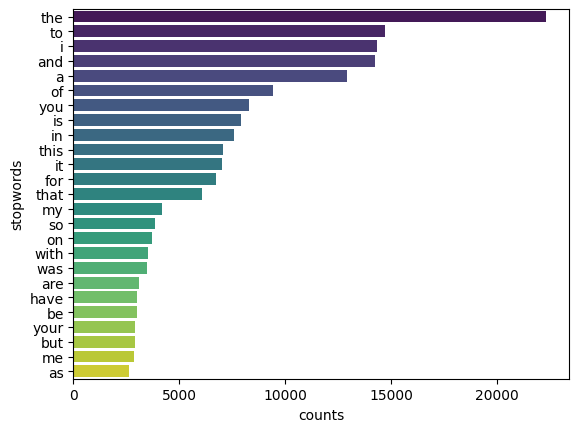

In [168]:
sns.barplot(x='counts',y='stopwords',data=top25_stopwords[:25],palette='viridis')

In [169]:
df['num_chars']=df['Comment'].apply(len)
df[:4]

,Comment,Sentiment,sentiment_value,word_count,stopwords_count,num_chars
0,lets not forget that apple pay in 2014 require...,neutral,0,57,22,317
1,here in nz 50 of retailers don’t even have con...,negative,-1,29,14,163
2,i will forever acknowledge this channel with t...,positive,1,31,16,183
3,whenever i go to a place that doesn’t take app...,negative,-1,83,48,450


In [170]:
# join the complete comment
all_text=' '.join(df['Comment'])
all_text

Output hidden; open in https://colab.research.google.com to view.

In [171]:
char_frequency=Counter(all_text)

In [172]:
char_freq_df=pd.DataFrame(char_frequency.items(),columns=['char','frequency']).sort_values(by='frequency',ascending=False)
char_freq_df.tail(20)

,char,frequency
67,റ,1
64,ൻ,1
130,災,1
129,火,1
1244,極,1
1243,積,1
1241,首,1
1239,餐,1
1896,غ,1
1868,ऋ,1


In [173]:
char_freq_df['char'].values

array([' ', 'e', 't', ..., '🇭', '🇹', '🇸'], dtype=object)

In [174]:
# Remove special characters
pattern=r'[^a-z0-9\s!?.,]'

df['Comment']=df['Comment'].apply(lambda x:re.sub(pattern,'',x))

In [175]:
# join the complete comment
all_text=' '.join(df['Comment'])
all_text

Output hidden; open in https://colab.research.google.com to view.

In [176]:
char_freq_df=pd.DataFrame(char_frequency.items(),columns=['char','frequency']).sort_values(by='frequency',ascending=False)
char_freq_df.tail(20)

,char,frequency
67,റ,1
64,ൻ,1
130,災,1
129,火,1
1244,極,1
1243,積,1
1241,首,1
1239,餐,1
1896,غ,1
1868,ऋ,1


In [ ]:
char_freq_df['char'].values

In [178]:
# defining the stop words and keeping essential words for analysis
stp_wrds=set(stopwords.words('english'))-{'not','but','however','yet','no'}

In [179]:
# Remove the stopwords

df['cleaned_words']=df['Comment'].apply(lambda x: ' '.join([i for i in word_tokenize(x) if i not in stp_wrds]))

In [180]:
df.head()

,Comment,Sentiment,sentiment_value,word_count,stopwords_count,num_chars,cleaned_words
0,lets not forget that apple pay in 2014 require...,neutral,0,57,22,317,lets not forget apple pay 2014 required brand ...
1,here in nz 50 of retailers dont even have cont...,negative,-1,29,14,163,nz 50 retailers dont even contactless credit c...
2,i will forever acknowledge this channel with t...,positive,1,31,16,183,forever acknowledge channel help lessons ideas...
3,whenever i go to a place that doesnt take appl...,negative,-1,83,48,450,whenever go place doesnt take apple pay doesnt...
4,apple pay is so convenient secure and easy to ...,positive,1,26,12,135,apple pay convenient secure easy use used kore...


In [181]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wnet=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [182]:
df['cleaned_words']=df['cleaned_words'].apply(lambda x:' '.join([wnet.lemmatize(i,pos='v') for i in word_tokenize(x)]))

In [183]:
df[:3]

,Comment,Sentiment,sentiment_value,word_count,stopwords_count,num_chars,cleaned_words
0,lets not forget that apple pay in 2014 require...,neutral,0,57,22,317,let not forget apple pay 2014 require brand ne...
1,here in nz 50 of retailers dont even have cont...,negative,-1,29,14,163,nz 50 retailers dont even contactless credit c...
2,i will forever acknowledge this channel with t...,positive,1,31,16,183,forever acknowledge channel help lessons ideas...


In [184]:
from wordcloud import WordCloud

In [185]:
def wordclou(text):
   cloud=WordCloud(height=400,width=800,background_color='white').generate(' '.join(text))
   plt.imshow(cloud,interpolation='bilinear')
   plt.axis('off')
   plt.show()

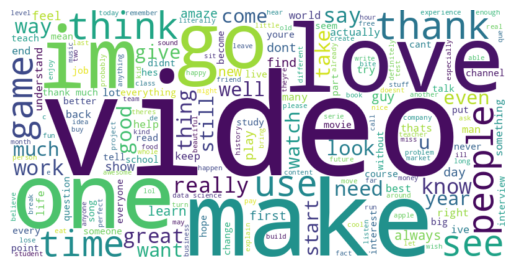

In [186]:
wordclou(df['cleaned_words'])

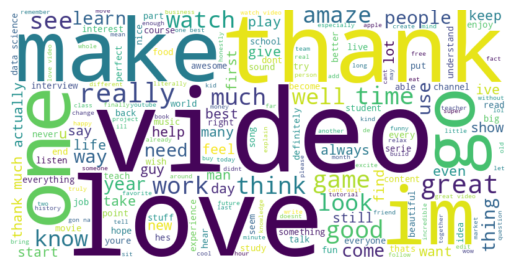

In [187]:
wordclou(df[df['sentiment_value']==1]['cleaned_words'])

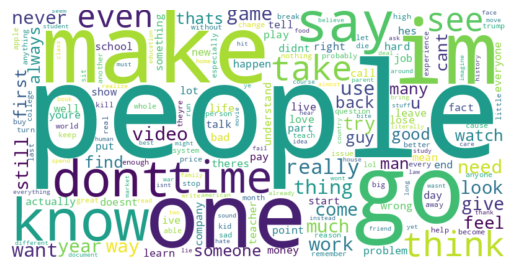

In [188]:
wordclou(df[df['sentiment_value']==-1]['cleaned_words'])

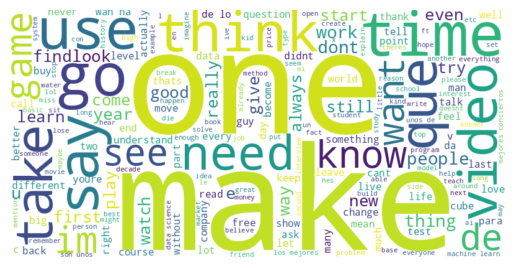

In [189]:
wordclou(df[df['sentiment_value']==0]['cleaned_words'])